In [1]:
import  nevis
import numpy as np 
import matplotlib.pyplot as plt
h = nevis.gb()

In [2]:
# the number of different heights > 0
data = h.flatten()
data = data[data > 0]

# Use numpy.unique to get unique values and their counts
unique_values, counts = np.unique(data, return_counts=True)

print(len(unique_values), data.shape[0])


12858 92016194


### Where are the local maxima with the largest b.o.a.?

In [3]:
# area = np.load('../res/area-with-sea.npy')
label = np.load('../res/label.npy')
maxima = np.load('../res/maxima.npy')

In [4]:
inland = nevis.inland_below_sea_level()
new_inland = inland.copy()
new_inland[:, 1] = inland[:, 0] // 50
new_inland[:, 0] = inland[:, 1] // 50
new_inland

array([[  147,  1763],
       [  517,  3412],
       [  518,  3412],
       ...,
       [24213,  9163],
       [24250,  9142],
       [24344,  9338]], dtype=uint32)

In [5]:
maxima.shape

(957174, 2)

In [6]:
try:    
    area = np.load('../res/area-ex-sea-new.npy')
except FileNotFoundError:
    from tqdm import tqdm
    area = np.zeros(maxima.shape[0], dtype=np.int32)
    m, n = label.shape
    for i in tqdm(range(m)):
        for j in range(n):
            # not sea && height >= 0
            if h[i][j] >= 0:
                area[label[i][j]] += 1
    for i, j in new_inland:
        # not sea && height < 0
        area[label[i][j]] += 1

    np.save('../res/area-ex-sea-new.npy', area)

100%|██████████| 26000/26000 [02:41<00:00, 160.96it/s]


In [7]:
# change the maxima to metres that match with the plotting methods
# notice that (x, y) is mapped to (y, x) * 50
maxima_points = maxima.copy()
maxima_points[:, 0] = maxima[:, 1] * 50
maxima_points[:, 1] = maxima[:, 0] * 50

Show the highest 100 local maxima:

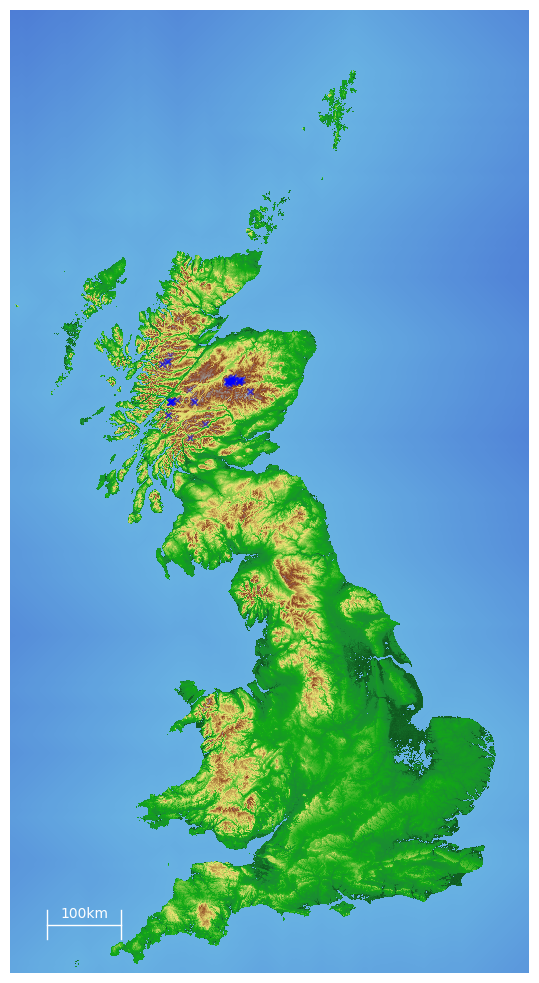

In [8]:
nevis.plot(points=np.array(maxima_points[:100]))
plt.show()

In [9]:
area_argsort = (-area).argsort() # minus so that the larget comes the first
# reorder the maxima by its b.o.a. area excluding sea
maxima_points_area_sorted = maxima_points[area_argsort]
# the correspoinding area for each b.o.a.
area_sorted = area[area_argsort]

Plot the 100 local maxima with the largest b.o.a. area excluding sea:

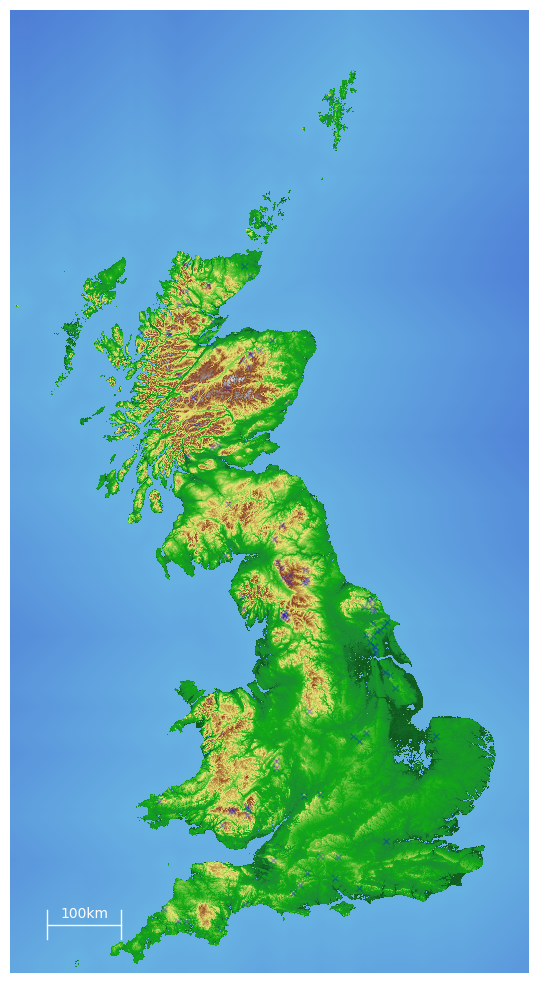

In [10]:
nevis.plot(points=np.array(maxima_points_area_sorted[:100]))
plt.show()

Plot the distribution of the $i$ local maxima with the largest b.o.a. areas, for $i$ in `[100, 3000, 4000, 5000, 10000]`, and generate a `kml` file for each case.

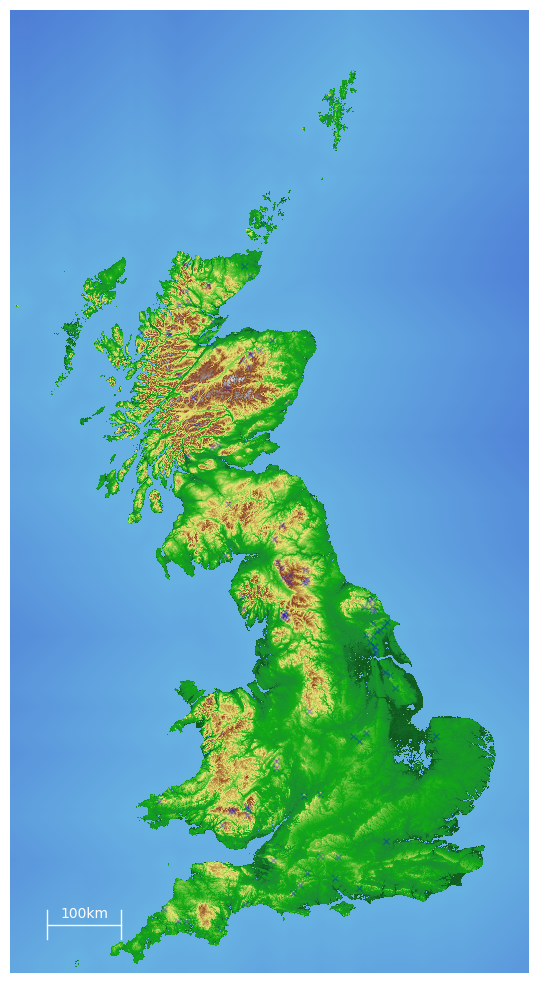

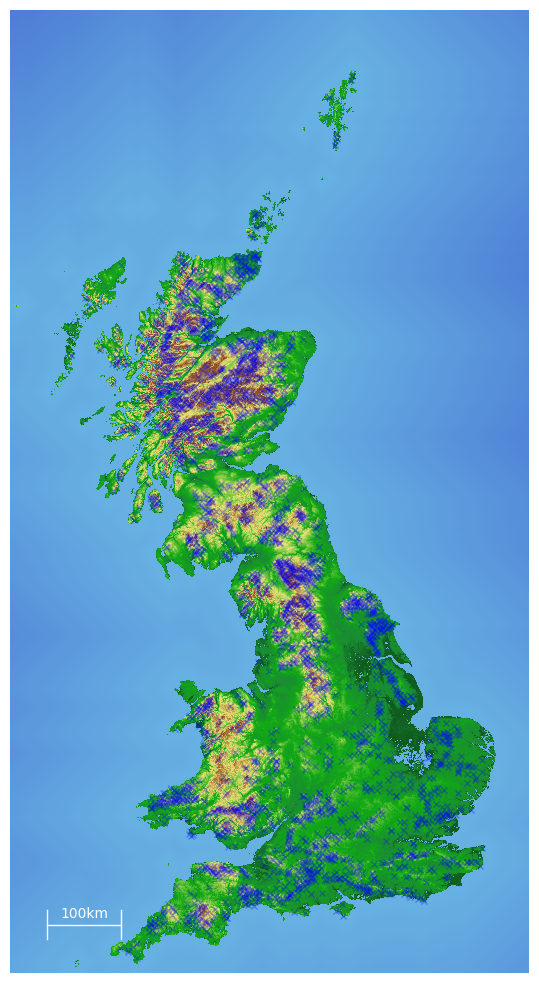

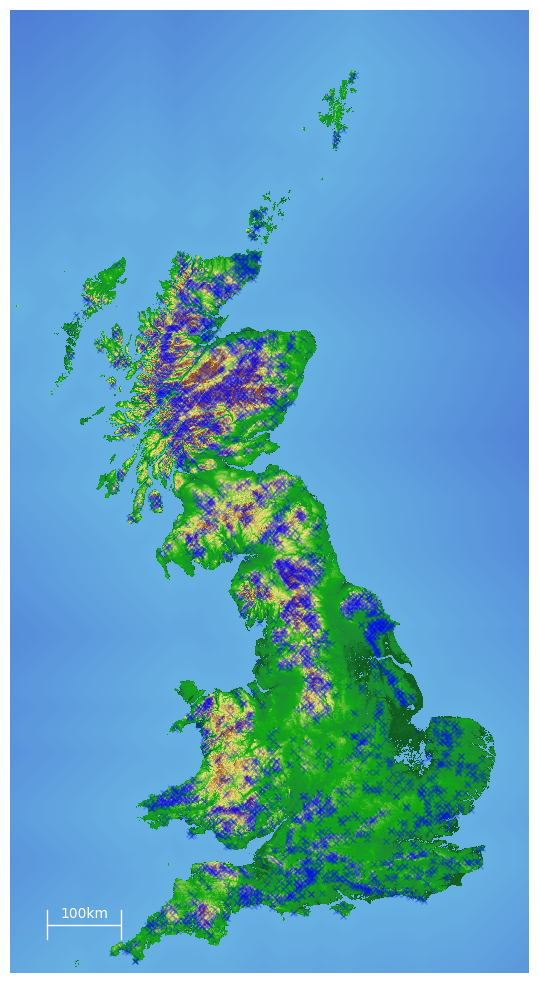

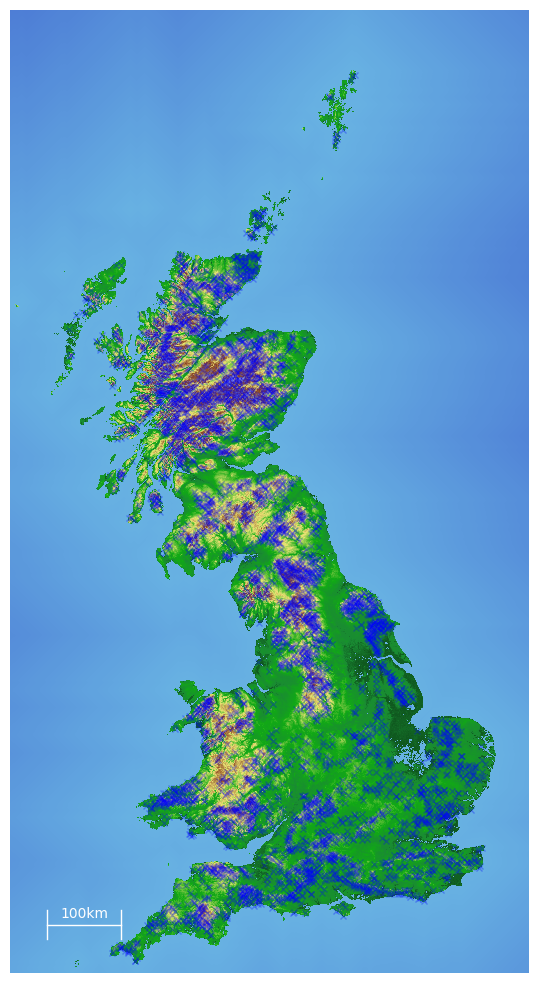

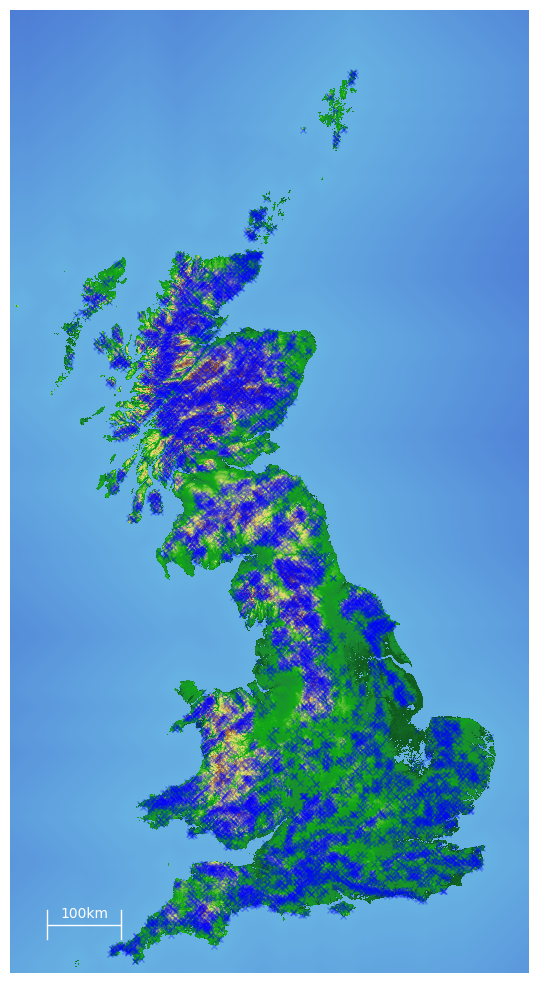

In [11]:
for i in [100, 3000, 4000, 5000, 10000]:
    nevis.generate_kml(f'../res/maxima-{i}.kml', points=list(maxima_points_area_sorted[:i]))
    nevis.plot(points=np.array(maxima_points_area_sorted[:i]))
    plt.show()


Inspect a certain local maximum, e.g. local maximum with the 10-th largest b.o.a. area:

In [12]:
# the area of this b.o.a.
area_sorted[9]

np.int32(6558)

In [13]:
# the coord of the local maximum
maxima_points_area_sorted[9]

array([236100, 957150], dtype=int32)

In [14]:
# save the surroundings to a text file
data = nevis.gb()
y, x = maxima_points_area_sorted[9]
y //= 50
x //= 50
part = data[x - 40 : x + 41, y - 40 : y + 41]
np.savetxt('../res/part-p9.txt', part, fmt='%d')
part

array([[305. , 337.3, 368. , ..., 148.7, 135.7, 122.9],
       [318.7, 347.6, 373.6, ..., 159. , 144.5, 131.2],
       [328.4, 349.7, 376.6, ..., 162.8, 152.9, 139.5],
       ...,
       [ 21.9,  20.8,  19.7, ..., 445.7, 435.5, 424.9],
       [ 27.7,  22.4,  20.9, ..., 447.3, 437. , 425.1],
       [ 36. ,  27.6,  22.3, ..., 450.8, 439.5, 426.5]], dtype=float32)